In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# np.c_ is the numpy concatenate function
# conver to a dataframe
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= feature_names + ['species'])

print('The shape of the dataset is ' + str(dataset.shape))
dataset.head()

The shape of the dataset is (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

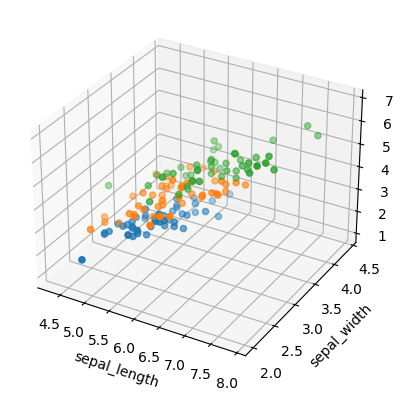

In [5]:
X = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dataset["species"]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    xs = X.loc[y == label, 'sepal_length']
    ys = X.loc[y == label, 'sepal_width']
    zs = X.loc[y == label, 'petal_length']
    ax.scatter(xs, ys, zs)

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

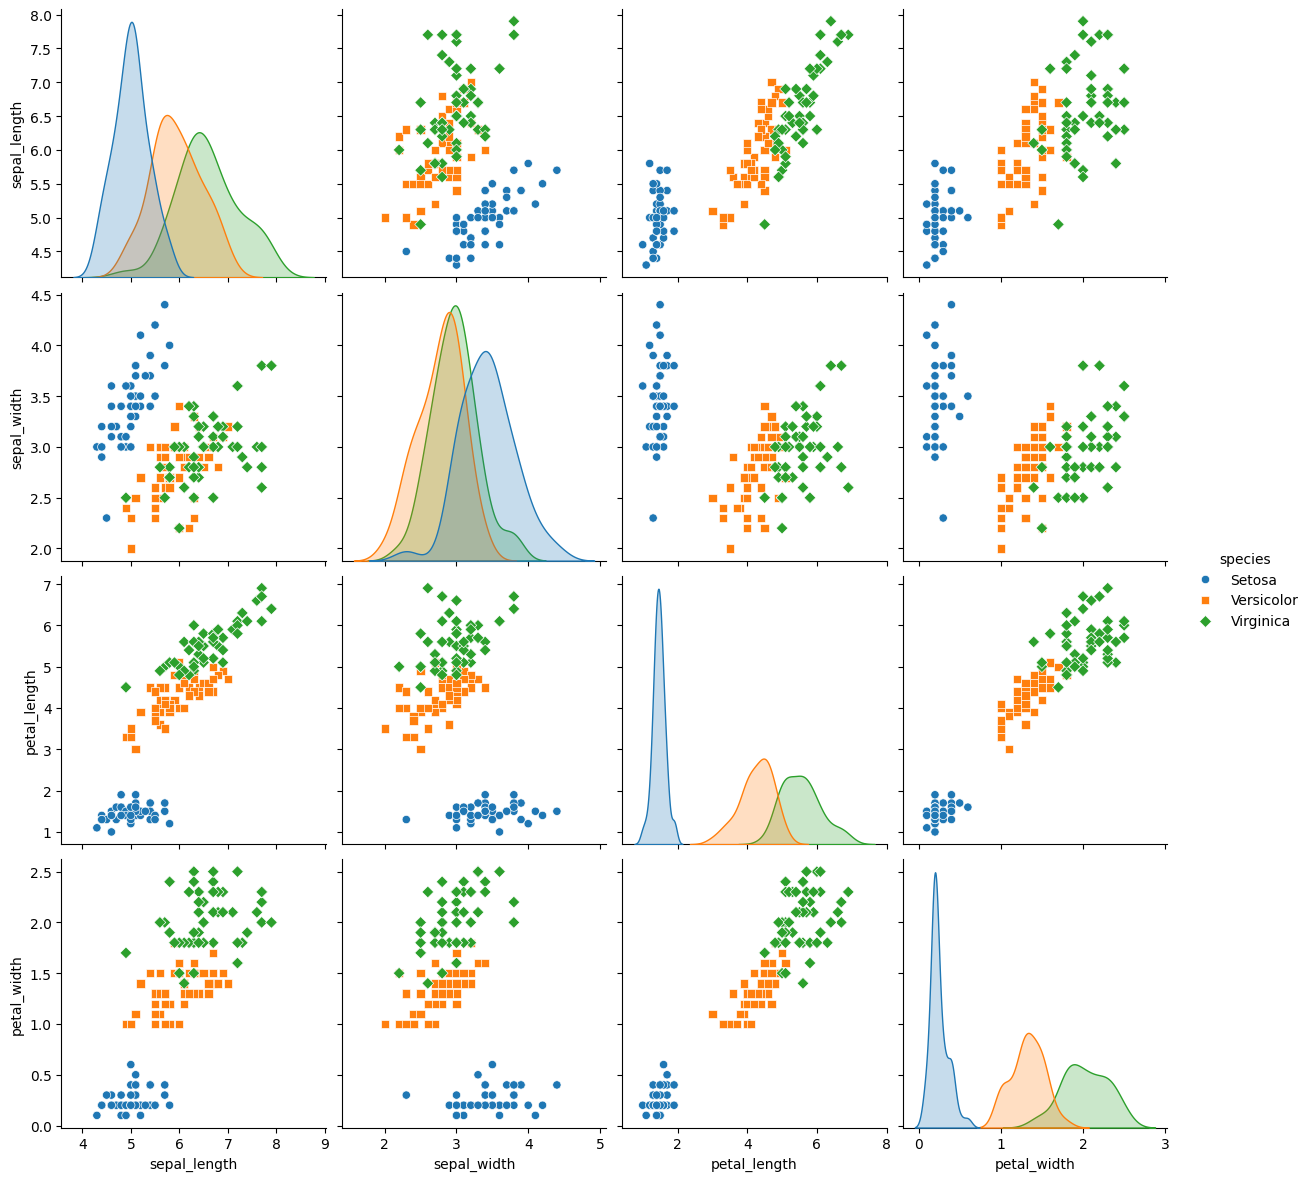

In [6]:
# View the relationships between variables; color code by species type
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

plt.figure()
sns.pairplot(dataset.replace({'species': di}), hue = "species", size=3, markers=["o", "s", "D"])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [8]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) #the scaler is fitted to the training set and then transformed
Normalized_X_test = pd.DataFrame(scaler.transform(X_test), columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])       #the scaler is applied to the test set


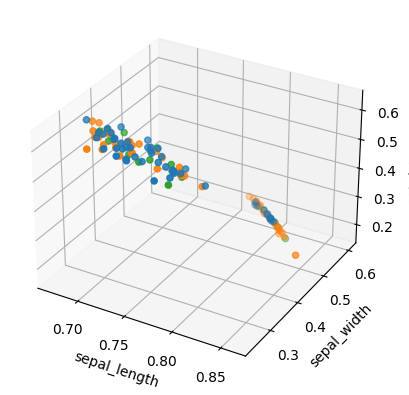

In [9]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    xs = Normalized_X_train.loc[y == label, 'sepal_length']
    ys = Normalized_X_train.loc[y == label, 'sepal_width']
    zs = Normalized_X_train.loc[y == label, 'petal_length']
    ax.scatter(xs, ys, zs)

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')

plt.show()

In [10]:
Normalized_X_train


,sepal_length,sepal_width,petal_length,petal_width
0,0.698048,0.338117,0.599885,0.196326
1,0.693334,0.385186,0.577778,0.192593
2,0.806420,0.542782,0.232621,0.031016
3,0.711712,0.350022,0.571703,0.210013
4,0.694177,0.303703,0.607405,0.238624
...,...,...,...,...
115,0.818031,0.517530,0.250418,0.016695
116,0.692768,0.318893,0.615794,0.197934
117,0.756765,0.352287,0.534955,0.130477
118,0.692991,0.341996,0.602992,0.197997


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

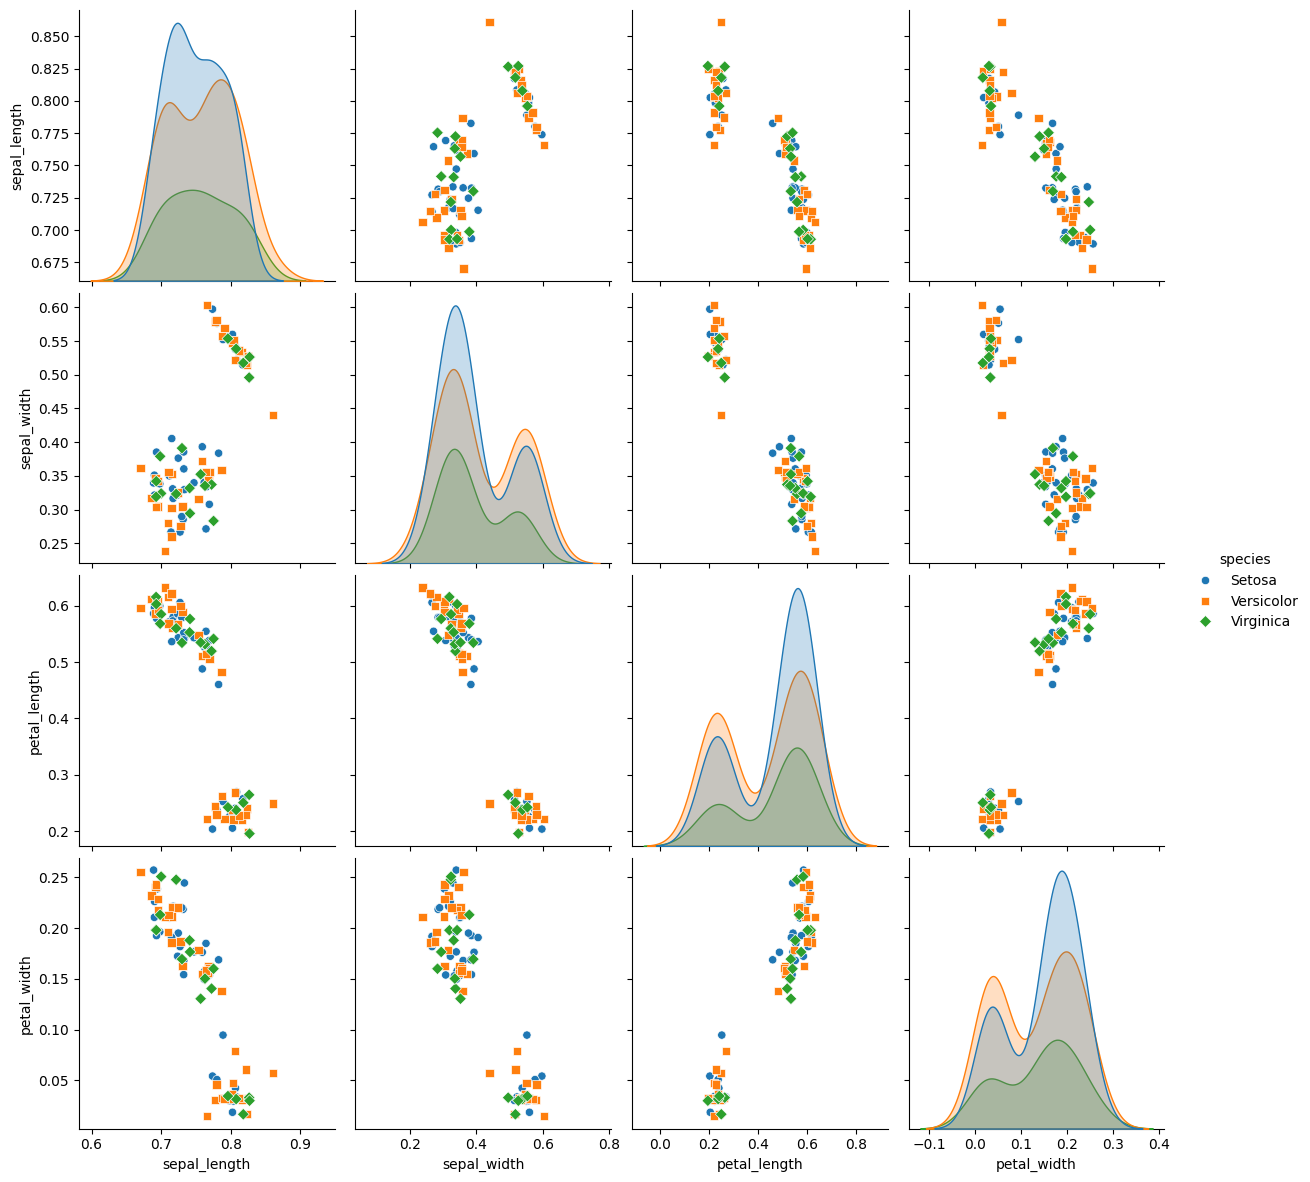

In [11]:
# View the relationships between variables; color code by species type
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

temp = Normalized_X_train.join(y_train)

plt.figure()
sns.pairplot(temp.replace({'species': di}), hue = "species", size=3, markers=["o", "s", "D"])
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [14]:
from sklearn.metrics import  accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 96.67 %.


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(Normalized_X_train, y_train)
y_pred = knn_classifier.predict(Normalized_X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [17]:
from sklearn.metrics import  accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 96.67 %.


In [18]:
def findMaxAcc(n, X_train,X_test,y_train,y_test ):
  knn_classifier = KNeighborsClassifier(n_neighbors=n)
  knn_classifier.fit(X_train, y_train)
  y_pred = knn_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

def findconfusionMat(n, X_train,X_test,y_train,y_test ):
  knn_classifier = KNeighborsClassifier(n_neighbors=n)
  knn_classifier.fit(X_train, y_train)
  y_pred = knn_classifier.predict(X_test)
  print( confusion_matrix(y_test, y_pred) )


In [19]:
for x in [1,5,10,50,100]:
  findMaxAcc(x,  Normalized_X_train,Normalized_X_test,y_train,y_test)

Accuracy of the kNN classifier is equal 100.0 %.
Accuracy of the kNN classifier is equal 100.0 %.
Accuracy of the kNN classifier is equal 100.0 %.
Accuracy of the kNN classifier is equal 96.67 %.
Accuracy of the kNN classifier is equal 56.67 %.


In [20]:
for x in [1,5,10,50,100]:
  findconfusionMat(x,  Normalized_X_train,Normalized_X_test,y_train,y_test)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


In [21]:
 # creating list of K for KNN
k_list = list(range(1,20))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

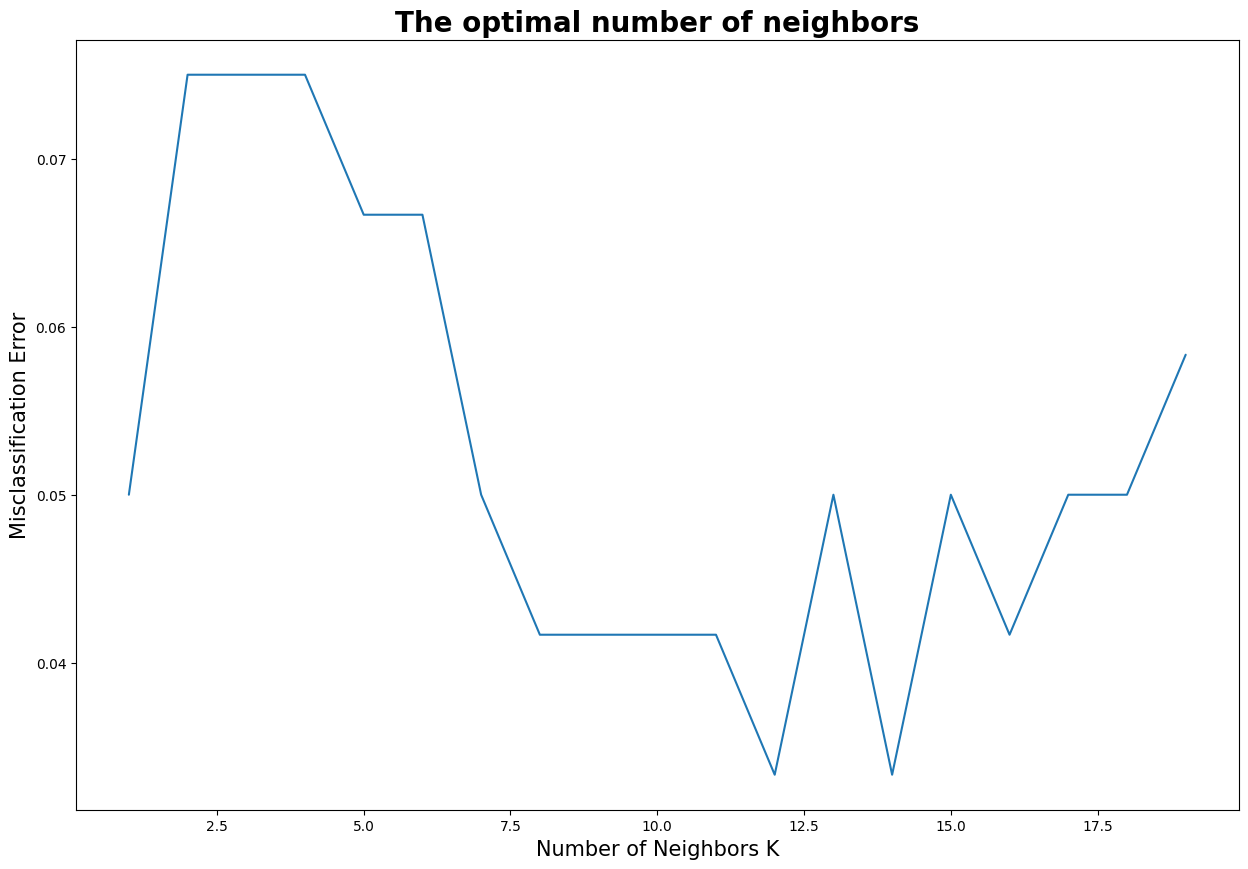

In [22]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [23]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 12.
